In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('Blues_r')
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
#Ignore warnings until end
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Dataset/ifood_marketing_data.csv')

In [3]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
# Dropping Duplicates
data.drop_duplicates()
data.shape

(2240, 28)

Column Details:

ID: Customer's Unique Identifier

Year_Birth: Customer's Birth Year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

MntWines: Amount spent on wine in the last 2 years

MntFruits: Amount spent on fruits in the last 2 years

MntMeatProducts: Amount spent on meat in the last 2 years

MntFishProducts: Amount spent on fish in the last 2 years

MntSweetProducts: Amount spent on sweets in the last 2 years

MntGoldProds: Amount spent on gold in the last 2 years

NumDealsPurchases: Number of purchases made with a discount

NumWebPurchases: Number of purchases made through the company's web site

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company's web site in the last month

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)

Complain: 1 if customer complained in the last 2 years, 0 otherwise


In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Data Cleaning and Preprocessing

Removing Irrelevant or Redundant Features

1. Clean columns name from space
2. Handling inconsistent data

In [7]:
data.columns = data.columns.str.replace(' ', '') # to delete any space in colunms name (income has space)

# transform Income column to a numerical
data['Income'] = data['Income'].str.replace('$', '')
data['Income'] = data['Income'].str.replace(',', '').astype('float')

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer']) #Dt_Customer is object so  we will trun it to datetime

Encoding Categorical Variables

In [8]:
data['Marital_Status']=data['Marital_Status'].map({'Divorced':1, 'Single':1, 'Married':2, 'Together':2, 'Widow':1, 'YOLO':1,
'Alone':1, 'Absurd':1})

In [9]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,1,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,1,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,2,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,2,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,1,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [10]:
# Checking for NUll Values
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

Handling missing value

1. removing rows or columns with missing values.
2. Impute missing values with a constant value.
3. Predicting constant value for Imputing missing value using k-nearest neighbors.

In [11]:
missing_values = data.isnull().sum().sort_values(ascending=False)
print(missing_values.loc[missing_values!=0], '\n')

Income    24
dtype: int64 



In [12]:
#Dropping Null Values

#missing value check
print('Sum of missing values before dropping:',data.isnull().sum().sum())

data = data.dropna()
#missing value check
print('Sum of missing values:',data.isnull().sum().sum())

Sum of missing values before dropping: 24
Sum of missing values: 0


Feature Engineering

1. Age : instead of year of birth
2. Customer_Days : It is a variable that calculates the number of days a customer is in the company
3. Family : to calculate the number of family members.
4. TotalMnt : to calculare total money spent by customer.
5. TotalPurchases :Total places of purchase.
6. Spending : the sum of the amount spent on product categories.
7. TotalCampaignsAcc : Total acceptance of advertising campaigns.

In [13]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [14]:
# customer Family count. 
data['Family'] = data['Marital_Status']+data['Kidhome']+data['Teenhome']

# Summing up all columns names including "Mnt" {MntWines, MntFruits, MntMeatProducts, MntFishProducts, etc}
mnt_cols = [col for col in data.columns if 'Mnt' in col]
data['TotalMnt'] = data[mnt_cols].sum(axis=1)

# Total Campaign Acceptance
data['TotalCampaignsAcc'] = data.filter(like='Accepted').sum(axis=1)+data['Response']

# Relationship Status
def get_relationship(row):
    if row['Marital_Status'] >1:
        return 1
    else:
        return 0
data['In_relationship'] = data.apply(get_relationship, axis=1)
data.head()  

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Family,TotalMnt,TotalCampaignsAcc,In_relationship
0,1826,1970,Graduation,1,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,1,1190,1,0
1,1,1961,Graduation,1,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,1,577,2,0
2,10476,1958,Graduation,2,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,US,3,251,0,1
3,1386,1967,Graduation,2,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,AUS,4,11,0,1
4,5371,1989,Graduation,1,21474.0,1,0,2014-04-08,0,6,...,0,0,0,1,0,SP,2,91,2,0


In [15]:
data[['Family','TotalMnt','TotalCampaignsAcc', 'In_relationship']].head()

,Family,TotalMnt,TotalCampaignsAcc,In_relationship
0,1,1190,1,0
1,1,577,2,0
2,3,251,0,1
3,4,11,0,1
4,2,91,2,0


In [16]:
data.drop(['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain' ,'Dt_Customer', 'Recency'],axis=1,inplace=True)

Dealing with outliers

methods for detecting outliers

1. Statistical methods such as Z-score , Interquartile range (IQR)
2. Distance-based methods such as K-nearest neighbors (KNN) , Isolation forest
3. Model-based methods such as One-class support vector machines (SVMs) , Clustering

deal with outliers

1. Remove the outliers
2. Transform the outliers : This method involves transforming the outliers so that they are more consistent with the rest of the data. 
    There are a number of different ways to do this, such as winsorization and capping. Winsorization involves replacing the outliers with the nearest non-outlier values. Capping involves replacing the outliers with a maximum or minimum value.
3. Model the outliers : This method involves fitting a model to the outliers and then using this model to predict the values of the outliers

In [17]:
# Exploring Data Columns
data.columns

Index(['ID', 'Education', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Country', 'Family',
       'TotalMnt', 'TotalCampaignsAcc', 'In_relationship'],
      dtype='object')

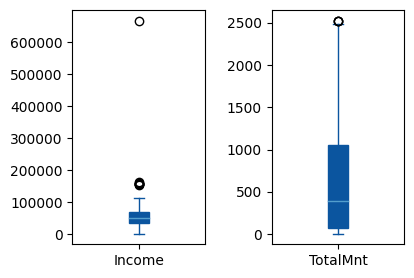

In [18]:
data_boxplot = data.drop(columns=[ 'ID', 'MntWines', 'MntFruits', 'MntMeatProducts',
                                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                                    'NumDealsPurchases','AcceptedCmp1', 'AcceptedCmp2',
                                    'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'TotalCampaignsAcc',
                                    'Response', 'Country','Education', 'In_relationship', 'Family'])
data_boxplot.plot(subplots=True, layout=(4,5), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

Outlier Removal

In [19]:
def outlier_removal(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df

In [20]:
# Outlier removal for TotalMnt and Income Columns
data = outlier_removal(data, 'TotalMnt')
data = outlier_removal(data, 'Income')


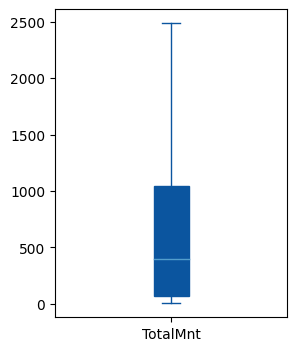

In [21]:
#Box plot for TotalMnt for verifying outliers
plt.figure(figsize=(3, 4))  
data['TotalMnt'].plot(kind='box', patch_artist= True)
plt.show()

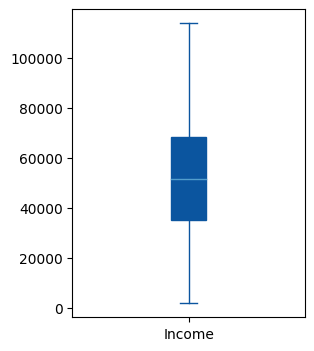

In [22]:
plt.figure(figsize=(3, 4))  
data['Income'].plot(kind='box', patch_artist= True)
plt.show()

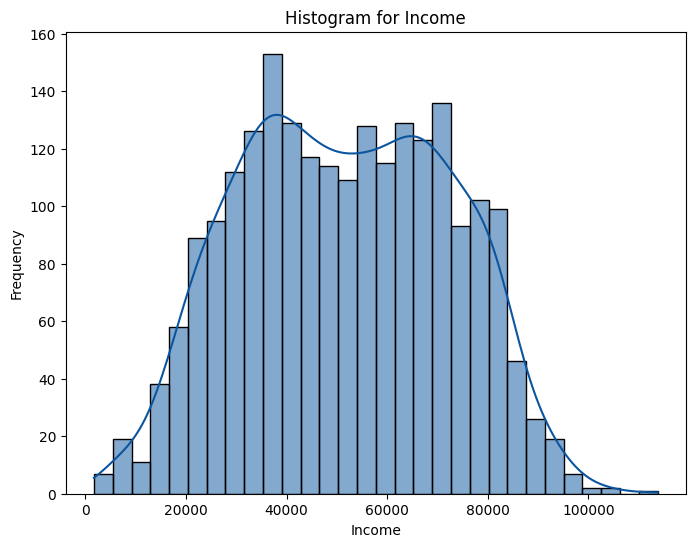

In [23]:

# Showing income distribution to undestand income data
plt.figure(figsize=(8, 6))  
sns.histplot(data=data, x='Income', bins=30, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Income distribution is close to normal distribution with no outliers.

In [24]:
# describe data
data.describe()

,ID,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Family,TotalMnt,TotalCampaignsAcc,In_relationship
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5588.675283,51581.912925,304.897959,26.284354,164.373243,37.680726,26.961451,44.068934,2.318367,0.073469,0.074376,0.072109,0.063946,0.013605,0.150113,2.594558,604.266667,0.447619,0.644898
std,3250.294478,20679.827310,336.159766,39.648494,216.383855,54.809865,40.912802,51.863187,1.886107,0.260965,0.262442,0.258727,0.244711,0.115872,0.357264,0.905101,598.325227,0.890360,0.478653
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000
25%,2815.000000,35196.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,69.000000,0.000000,0.000000
50%,5462.000000,51267.000000,176.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,396.000000,0.000000,1.000000
75%,8420.000000,68148.000000,505.000000,33.000000,231.000000,50.000000,33.000000,56.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1044.000000,1.000000,1.000000
max,11191.000000,113734.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2486.000000,5.000000,1.000000


## Correlation matrix
- There are many columns in the data. The correlation matrix will be very crowded if we use all columns of the data frame. We will group the columns and explore correlation between columns in each group and the column 'TotalMnt'. We will focus on the column 'TotalMnt' to understand how we can segment the customers who buy the most in overall. We can run similar analysis for every type of product.


In [25]:
data.columns

Index(['ID', 'Education', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Country', 'Family',
       'TotalMnt', 'TotalCampaignsAcc', 'In_relationship'],
      dtype='object')

In [26]:
cols_demographics = ['Income']
cols_Family = ['Family']
cols_relationship = ['In_relationship']
cols_mnt = ['TotalMnt', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_campaigns = ['TotalCampaignsAcc']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['Education']

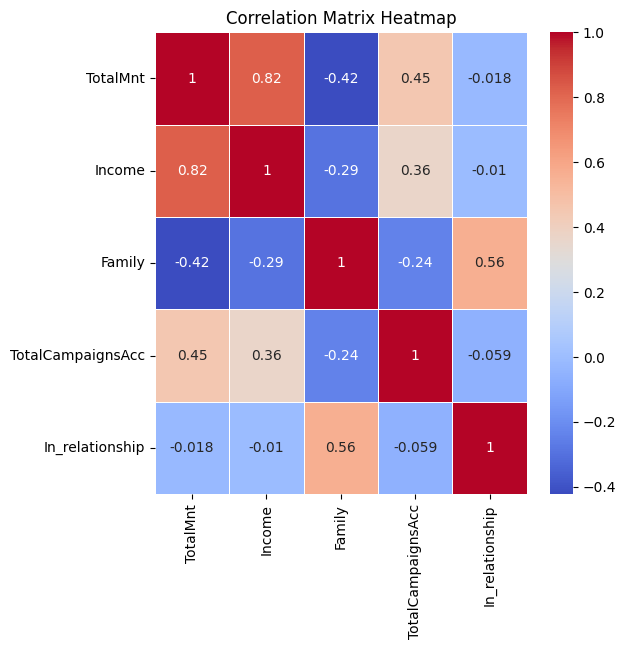

In [27]:
corr_matrix = data[['TotalMnt'] + cols_demographics + cols_Family + cols_campaigns + cols_relationship].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Plot illustrating the effect of high income on spending

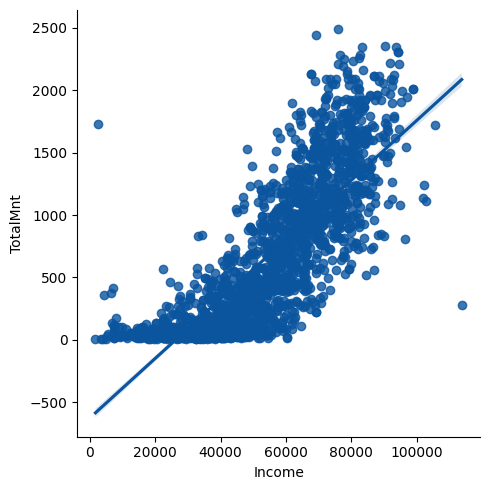

In [28]:
sns.lmplot(x='Income', y='TotalMnt', data=data);
plt.show()

- This Plot illustrating the effect of high income on Total Amount spending.

Plotting Box plot for understanding relationship b/w Total Spending & Total campaigns acceptance count.

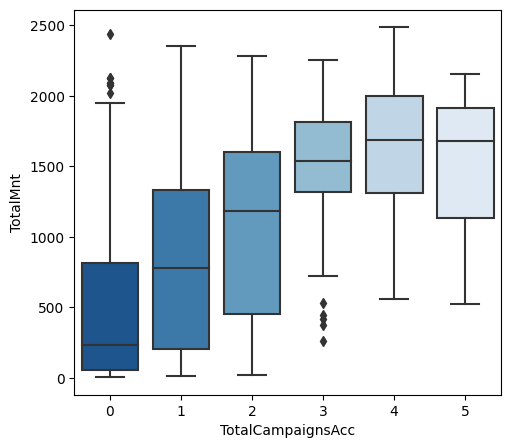

In [29]:
plt.figure(figsize=(5.5,5))
sns.boxplot(x='TotalCampaignsAcc', y='TotalMnt', data=data,palette='Blues_r');

- Acceptance of advertising campaigns increases with increased spending.


Plotting Box plot for understanding relationship b/w Income & Total campaigns acceptance count.


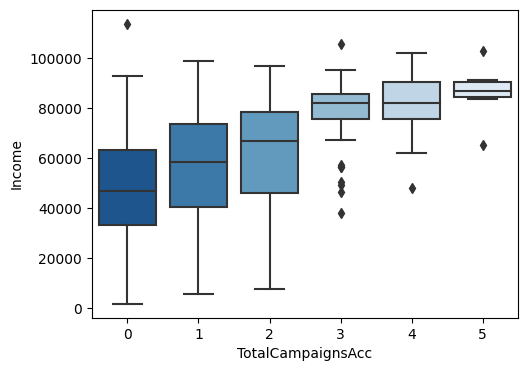

In [30]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Income', data=data);

Plotting Box plot for understanding relationship b/w Family & Total Amount Spent.

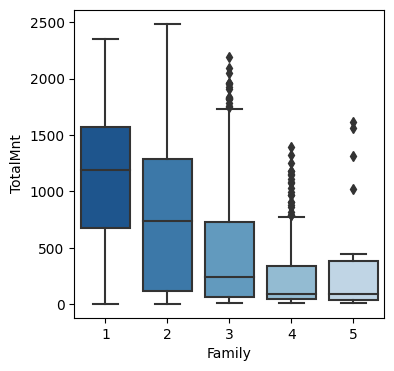

In [31]:
plt.figure(figsize=(4,4))
sns.boxplot(x='Family', y='TotalMnt', data=data);

- Plot illustrating negative effect of having dependents (kids & teens) on spending.

Plotting Box plot for understanding relationship b/w Family & Campaigns Acceptance count.


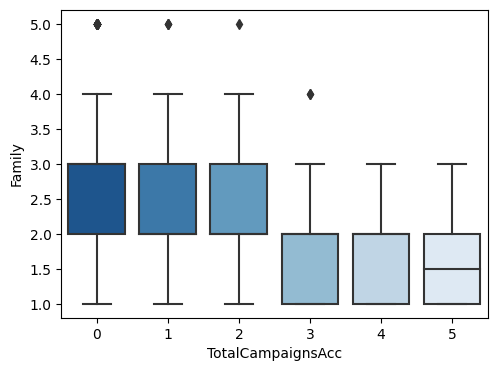

In [32]:
plt.figure(figsize=(5.5,4))
sns.boxplot(x='TotalCampaignsAcc', y='Family', data=data);

- Plot illustrating negative effect of having dependents (kids & teens) on Campaign Acceptance.

### Plots conclusion:
   - Increased income leads to increased spending, which leads to increased acceptance of advertising campaigns.
   - Negative effect of having Kids and Teens on Spending and Campaigns Acceptance 

There is a direct relationship between acceptance of advertising campaigns and income. The higher the income, the greater the acceptance of advertising campaigns

After presenting the correlation between TotalCampaignsAcc and all variables, we now will present the most important variables that have an impact on TotalCampaignsAcc variable. Perhaps the benefit of this is that some variables do not have a significant relationship effect, but rather have a strong effect. For example, income does not have a strong relationship, but it affects the increase in the quantity purchased (spending), meaning that the greater the income, the greater the spending and the greater TotalCampaignsAcc.

RandomForestClassifier Model

feature_importances

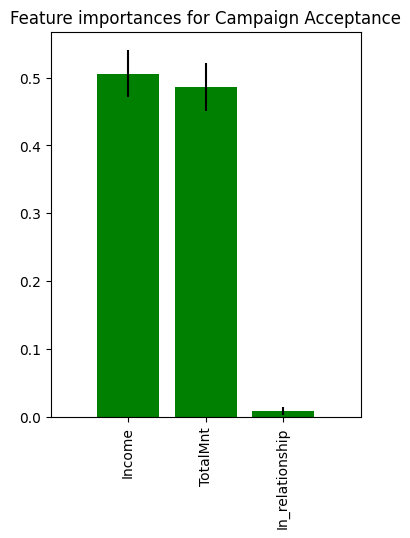

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Features 
X =data[['Income','TotalMnt','In_relationship']]
y = data.TotalCampaignsAcc

# Loading regression model
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X,y)

# extracting feature importance
importances = clr_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clr_rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(1, figsize=(4, 5))
plt.title("Feature importances for Campaign Acceptance")
plt.bar(range(X.shape[1]), importances[indices],color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Conclusion and Recommendations

After analyzing the data and discovering the reasons for the lack of increased acceptance of our advertising campaigns, this is because our advertising campaigns are directed to people with the highest income, even though most of our clients are not those with the highest income. We found this when we compared income, spending, and the total acceptance of advertising campaigns between PHD holders and graduates. We also notice that our best-selling products are expensive things. such as wine, gold, and meat, and countries with higher income were more likely to spend and accept advertising campaigns.


    Therefore, we must divide our customers into groups and direct our advertising campaigns based on income and products that are appropriate for this group

# Data Visualization

Does US fare significantly better than the Rest of the World in terms of total purchases?

Plot total number of purchases by country:

    Findings:

        1. Spain (SP) has the highest number of purchases

        2. US is second to last, therefore the US does not fare better than the rest of the world in terms of the total number of purchases

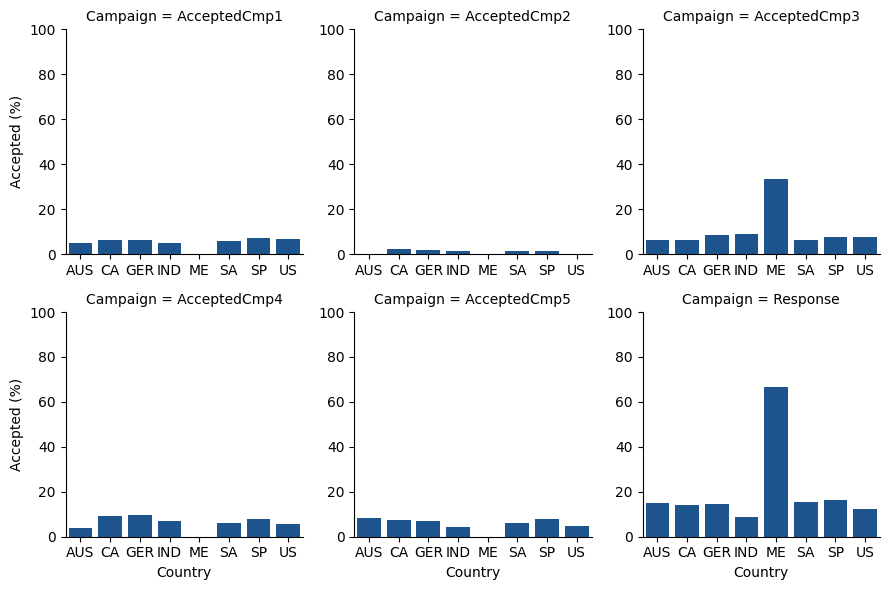

,Country,Campaign,Accepted (%)
44,ME,Response,66.666667


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data_g = data[['Country', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

# Group by country and calculate the percentage of acceptance for each campaign
df_percentage = data_g.groupby('Country').mean() * 100

# Reset index for plotting
df_percentage.reset_index(inplace=True)


# Melt the DataFrame for better visualization
df_melted = df_percentage.melt(id_vars='Country', var_name='Campaign', value_name='Accepted (%)')

# Bar graphs
g = sns.FacetGrid(df_melted, col='Campaign', col_wrap=3, sharex=False, sharey=False, ylim=(0, 100))
g.map(sns.barplot, 'Country', 'Accepted (%)', order=df_percentage['Country'].unique())
g.set_axis_labels('Country', 'Accepted (%)')
plt.show()

# maximum acceptance rate by country
df_melted[df_melted['Accepted (%)'] == df_melted['Accepted (%)'].max()]

73% of our clients did not accept any advertising campaign

What is the percentage of customers who accepted the campaigns?

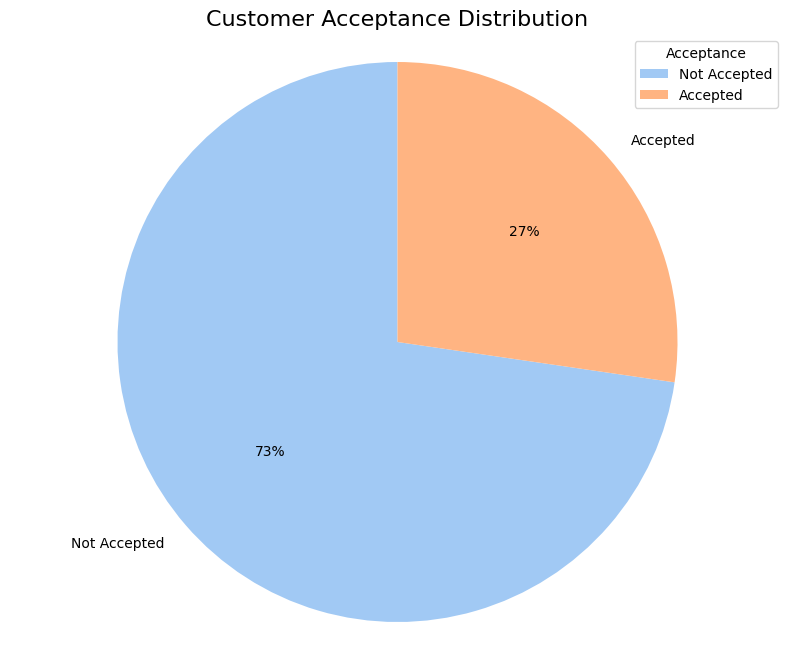

In [35]:
data['is_accepted'] = data['TotalCampaignsAcc'].apply(lambda x: 'Accepted' if x > 0 else 'Not Accepted')

# Set the figure size using plt.subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Calculate value counts and labels
counts = data['is_accepted'].value_counts()
labels = counts.index.tolist()

# Define Seaborn color palette
colors = sns.color_palette('pastel')

# Create pie chart
ax.pie(counts, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)

# Set title and legend
ax.set_title('Customer Acceptance Distribution', fontsize=16)
ax.legend(title='Acceptance', loc='upper right')

# Set aspect ratio to be equal
ax.axis('equal')

# Display the pie chart
plt.show()

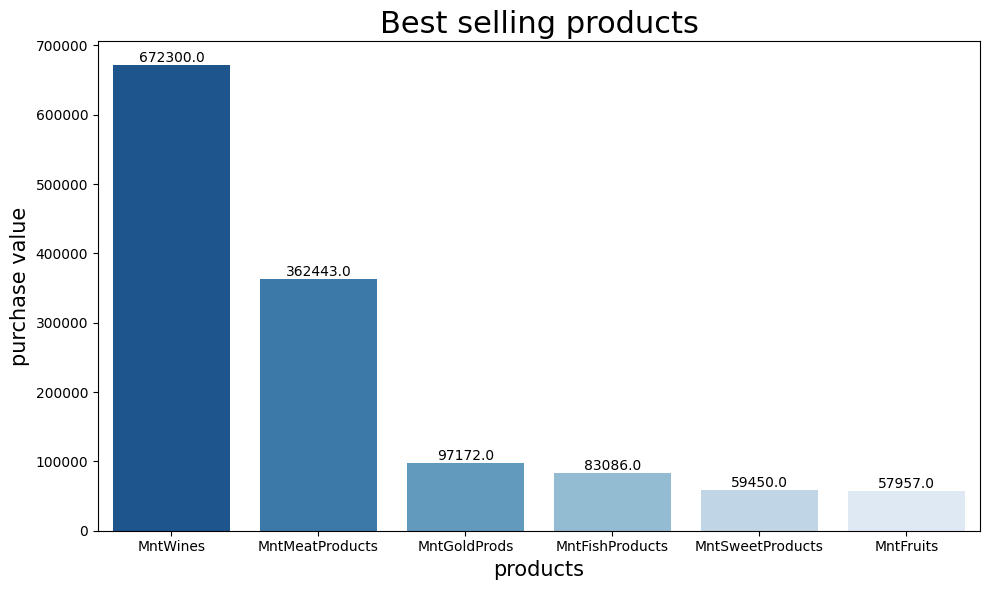

In [36]:
Products = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds']

# Create a DataFrame to store the percentage of accepted campaigns
Products_df  = pd.DataFrame(data[Products ].sum(), columns=['Sum']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Sum', data=Products_df.sort_values('Sum', ascending=False))

# Set labels and title
plt.xlabel('products' ,size=15)
plt.ylabel('purchase value' ,size=15)
plt.title('Best selling products',size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

Plot total amount spent by country:

Findings:

    1. Spain (SP) has the highest total amount spent on purchases
    2. US is second to last, therefore the US does not fare better than the rest of the world in terms of the total amount spent on purchases

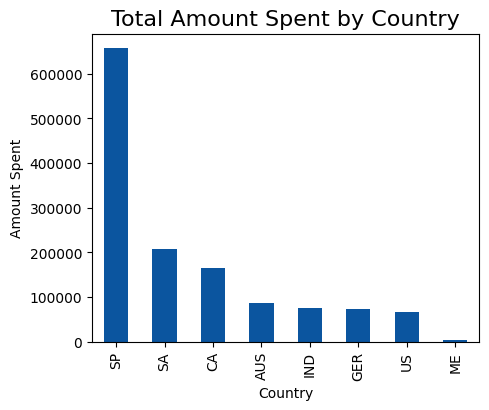

In [37]:
plt.figure(figsize=(5,4))
data.groupby('Country')['TotalMnt'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

Is there a significant relationship between geographical regional and success of a campaign?

Plot success of campaigns by region:

    Findings:
        The campaign acceptance rates are low overall
        The campaign with the highest overall acceptance rate is the most recent campaign (column name: Response)
        The country with the highest acceptance rate in any campaign is Mexico
        Is the effect of region on campaign success statistically significant? See below.

In [38]:
# convert country codes to correct nomenclature for choropleth plot
# the dataset doesn't provide information about country codes
## ...so I'm taking my best guess about the largest nations that make sense given the codes provided
df = data.copy()
df['Country_code'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)
# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country')
fig.show()

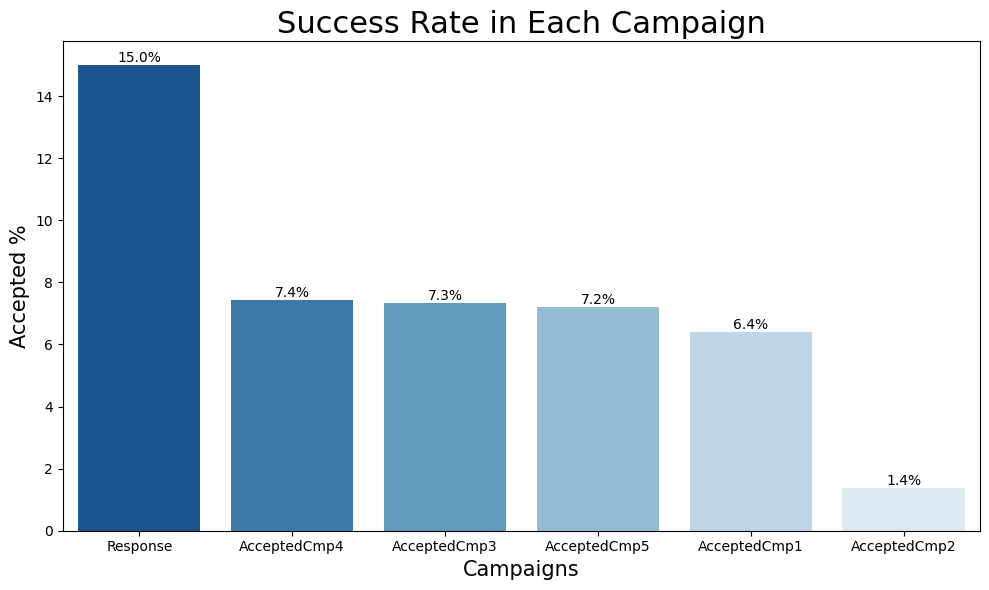

In [39]:
# Success Rate in Each Campaign
AcceptedCmp = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# Create a DataFrame to store the percentage of accepted campaigns
campaigns = pd.DataFrame(data[AcceptedCmp].mean() * 100, columns=['Percent']).reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the bar plot
ax = sns.barplot(x='index', y='Percent', data=campaigns.sort_values('Percent', ascending=False))

# Set labels and title
plt.xlabel('Campaigns', size=15)
plt.ylabel('Accepted %', size=15)
plt.title('Success Rate in Each Campaign', size=22)

# Add percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()

1. The highest acceptance rate for an advertising campaign is the last campaign (Response)
2. The lowest acceptance rate for an advertising campaign is the second campaign (AcceptedCmp2)

In [40]:
data.columns

Index(['ID', 'Education', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Country', 'Family',
       'TotalMnt', 'TotalCampaignsAcc', 'In_relationship', 'is_accepted'],
      dtype='object')

In [44]:
Process_data = data.drop(['ID', 'Education',
       'NumDealsPurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Country', 'Family', 'is_accepted'], axis=1)

In [45]:
Process_data.to_csv('./Dataset/process_data.csv', index=False, encoding='utf-8')